In [1]:
import networkx as nx
import scipy
import matplotlib.pyplot as plt
import clique_discovery 

In [14]:
def nice_graph(T):
    
    def append_path(G, path, weight):
        previous = path[0]
        for node in path[1:]:
            edges.append( (previous, node, {"weight":weight}) )
            previous = node
        G.add_edges_from(edges)

 

    weighted_paths = clique_discovery.infer_paths_from_traces( T )
    print(weighted_paths)
    found_paths = {}
    edges = []
    G = nx.DiGraph()
    
    # Check serial: solo disjuntos del mismo largo
    for w in sorted(weighted_paths, reverse=True):
        for path_w in weighted_paths[w]:
            if w not in found_paths.keys():
                found_paths[w] = []
            if all( [ not set(path_w).intersection(set(z)) for z in found_paths[w] ] ):
                append_path( G, path_w, w )
                
#                 # Now check if this guy has a loop....
#                 # Check loops: in w2 < w only
#                 loop_candidate = list(reversed(path_w))
#                 for w2 in sorted(weighted_paths, reverse=True):
#                     if w2 < w:
                
                
    pos = nx.spring_layout(G)
    nx.draw_networkx (G, pos, node_color="#cccccc", with_labels=True, connectionstyle='arc3, rad=0.5' )
    plt.show()

{2: [['A', 'B', 'C']], 1: [['C', 'B', 'A']]}


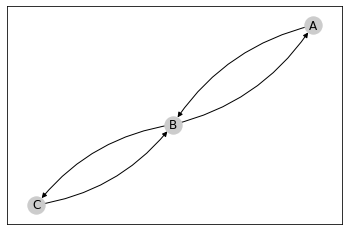

In [3]:
T = [list("ABCABC")]
nice_graph( T )

{1: [['O', 'P', 'Q', 'R'], ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']]}


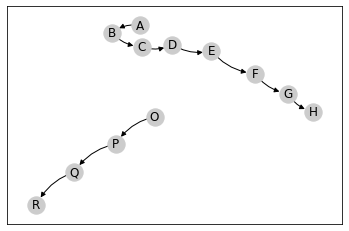

In [4]:
T = [
    list("ABCDEFGH"),
    list("OPQR")
]
nice_graph( T )

{3: [['A', 'B', 'C', 'D']], 2: [['D', 'C', 'B', 'A']], 1: [['A', 'E', 'F'], ['D', 'E', 'F'], ['B', 'E', 'F'], ['C', 'E', 'F']]}


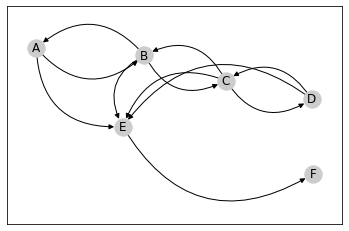

In [25]:
loop_trace = [
    list("ABCDABCDABCDEF"),
]
nice_graph( loop_trace ) 

{6: [['A', 'B']], 3: [['A', '1', '5'], ['A', '2', '6'], ['B', '1', '5'], ['B', '2', '6']], 2: [['A', 'p', 'q'], ['A', 's', 't'], ['A', 'm', 'n'], ['B', 'p', 'q'], ['B', 's', 't'], ['B', 'm', 'n']], 1: [['q', '5'], ['p', '5'], ['t', '5'], ['n', '5'], ['s', '5'], ['m', '5'], ['q', '6'], ['p', '6'], ['t', '6'], ['n', '6'], ['s', '6'], ['m', '6'], ['q', '2'], ['p', '2'], ['t', '2'], ['n', '2'], ['s', '2'], ['m', '2'], ['q', '1'], ['p', '1'], ['t', '1'], ['n', '1'], ['s', '1'], ['m', '1']]}


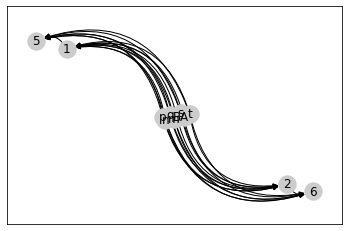

In [21]:
tree_trace = [
    list("ABmn15"),
    list("ABmn26"),
    list("ABpq15"),
    list("ABpq26"),
    list("ABst15"),
    list("ABst26"),
]
nice_graph(  tree_trace ) 

{2: [['A', 'B']], 1: [['A', 'D'], ['A', 'C'], ['B', 'D'], ['B', 'C']]}


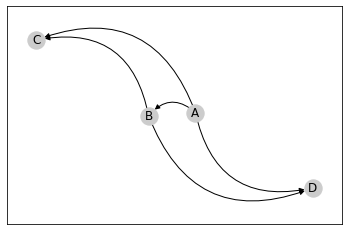

In [22]:
tree_trace = [
    list("ABC"),
    list("ABD"),
]
nice_graph(  tree_trace )

{6: [['A', 'c', 'd', 'e'], ['B', 'c', 'd', 'e']], 3: [['A', 'B', 'F', 'G', 'H'], ['e', 'd', 'c', 'F', 'G', 'H']]}


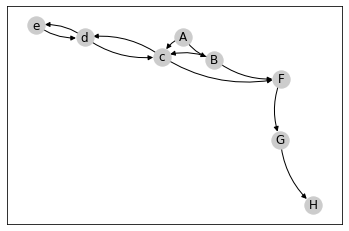

In [8]:
loop_inside = [
#     list("ABFG"),
    list("ABcdecdeFGH"),
    list("ABcdecdecdeFGH"),
    list("ABcdeFGH"),
]
nice_graph( loop_inside )

{6: [['A', 'B', 'C']], 5: [['C', 'D', 'E', 'F', 'G'], ['A', 'D', 'E', 'F', 'G'], ['B', 'D', 'E', 'F', 'G']]}


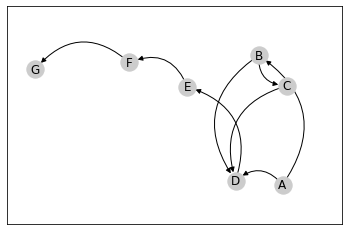

In [20]:
# With error in the middle
truncated_trace = [
    list("ABCDEFG"),
    list("ABCDEFG"),
    list("ABCDEFG"),
    list("ABCDEFG"),
    list("ABCDEFG"),
    list("ABC"),
]
nice_graph(truncated_trace)